In [3]:
from __future__ import print_function
import time
import intrinio_sdk
from intrinio_sdk.rest import ApiException
from pprint import pprint
from datetime import date
from datetime import timedelta
import io
from collections import Counter
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
class Stock:
    def __init__(self, ticker, start_date=date.today(), end_date=date.today(), frequency='daily', page_size=100):
        intrinio_sdk.ApiClient().configuration.api_key['api_key'] = 'OmEzMWY4NDEzMzRlOGM3Y2ZjNmY3ZjAwZWRmZWI2MTIy'
        
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.frequency = frequency
        self.security_api = intrinio_sdk.SecurityApi()
        self.api_response = self.security_api.get_security_stock_prices(
            ticker, start_date=start_date, end_date=end_date, 
            frequency=frequency, page_size=int((end_date - start_date).days), next_page='')
        self.date_range_iter = self.daterange(start_date, end_date)
        self.prices = self.api_response.stock_prices_dict
        self.start_price = self.api_response.stock_prices_dict[0]['close']
        self.end_price = self.api_response.stock_prices_dict[-1]['close']
    
    def display_close_price(self):
        plt.title(self.ticker + " Stock Price")
        close_prices = []
        date = []
        for i in self.prices:
            close_prices.append(i['close'])
            date.append(i['date'])
        plt.plot(date, close_prices)
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.show()
        #TODO: add start and end date arguments 
    
    def get_stock_price_dict(self):
        return self.api_response.stock_prices_dict
    
    def get_api_response(self):
        return self.api_response
    
#     def start_price(self):
#         return self.api_response.stock_prices_dict[0]['close']
    
#     def end_price(self):
#         return self.api_response.stock_prices_dict[-1]['close']
    
    def get_performance(self, start=None, end=None):
        if (start == None):
            start = self.start_date
        if (end == None):
            end = self.end_date
        
        max_ind = len(self.prices)
        curr_ind = 0
        gains = []

        for date in self.daterange(start, end):
            if ((date - self.start_date).total_seconds() < 0):
                gains.append(0)
            elif ((self.end_date - date).total_seconds() < 0):
                gains.append(0)
            elif (curr_ind >= max_ind):
                gains.append(0)
            else:
                gains.append(self.prices[curr_ind]['close'] - self.start_price)
                curr_ind += 1
        return np.array(gains)
    
    def daterange(self, start_date, end_date):
        delta = timedelta(days=1)
        while start_date <= end_date:
            if (start_date.weekday() >= 5):
                start_date += delta
                continue
            yield start_date
            start_date += delta
    
    
class Portfolio:
    def __init__(self, capital=1000):
        self.capital = float(capital)
        self.holdings = {}
        
    def buy(self, ticker='', start=date.today(), end=date.today()):
        newStock = Stock(ticker, start_date=start, end_date=end)
        self.holdings[newStock] = (start, end)
    
    def display_performance(self):
        min_date = min(self.holdings.values(), key = lambda x: x[0])[0]
        max_date = max(self.holdings.values(), key = lambda x: x[1])[1]
        
        perf = np.array([self.capital] * len(list(self.daterange(min_date, max_date))))
        for i in self.holdings:
            perf += i.get_performance(start=min_date, end=max_date)
        
        plt.title("Portfolio Performance")
        plt.plot(list(self.daterange(min_date, max_date)), perf)
        plt.xlabel("Date")
        plt.ylabel("$")
        plt.show()
        #some of the logic is wrong, so that if two stocks are seperated, then jumps to 1000 which is not right
    
    def daterange(self, start_date, end_date):
        delta = timedelta(days=1)
        while start_date <= end_date:
            if (start_date.weekday() >= 5):
                start_date += delta
                continue
            yield start_date
            start_date += delta

-472


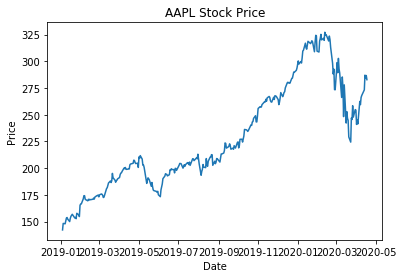

max_ind: 325
[   0.       3.89     1.63     4.25    -9.55   -14.81   -16.73   -23.37
  -20.33   -41.39   -37.87   -41.89   -28.51   -27.99   -35.06   -24.36
  -37.28   -35.92   -58.43   -53.56   -38.02   -36.13   -29.94   -40.59
   -4.83   -34.57    -7.37     2.54   -16.63     6.23    10.12    19.94
    6.52    16.01    -9.44    -9.28     9.85     5.28    15.38    30.25
   37.5     40.82    36.2     42.15    42.07    44.4     36.81    38.75
   37.23    42.41    38.65    36.05    25.86    26.71    41.07    41.54
   34.89    26.15    35.51    36.43    34.9     33.77    35.93    32.44
   28.54    29.88    34.16    27.53    26.83    20.39    15.59    17.
   14.63    17.55    10.85     8.72     7.       7.11     1.47     1.2
   -3.36    -2.78    -3.06    -2.39    -2.94    -7.65   -11.34   -12.03
  -14.32   -15.88   -12.09   -17.22   -21.06   -23.35   -18.64   -15.55
  -14.96   -18.51   -16.43   -21.02   -20.79   -19.61   -16.51   -15.7
  -17.04   -20.16   -18.33   -20.84   -20.6    -22.66  

In [38]:
appl = Stock(ticker="AAPL", start_date=date(2019, 1, 3), end_date=date.today())
appl.display_close_price()
print(appl.get_performance())

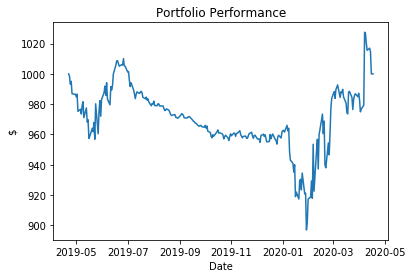

In [53]:
testport = Portfolio()
testport.buy('AAPL', start=date(2020, 1, 3))
time.sleep(61)
testport.buy('MSFT', start=date(2019, 4, 20))
testport.display_performance()